In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Load and preprocess the time series data
df = pd.read_excel('/content/gdrive/My Drive/Green7.xlsx')
df['Dates'] = pd.to_datetime(df['Dates'])
df.set_index('Dates', inplace=True)
df.sort_index(inplace=True)

In [ ]:
# Create the lag columns
lags = [1, 2, 3, 4, 5, 25]

for lag in lags:
    column_name = f'lag{lag}'
    df[column_name] = df['GreenBond'].shift(lag)     

In [ ]:
#fill NAn values with zeros
df = df.fillna(0)

In [ ]:
df.head(6)

,GreenBond,lag1,lag2,lag3,lag4,lag5,lag25,lag75
Dates,,,,,,,,
2021-01-04,158.98,0.00,0.00,0.00,0.00,0.00,0.0,0.0
2021-01-05,158.99,158.98,0.00,0.00,0.00,0.00,0.0,0.0
2021-01-06,158.77,158.99,158.98,0.00,0.00,0.00,0.0,0.0
2021-01-07,158.50,158.77,158.99,158.98,0.00,0.00,0.0,0.0
2021-01-08,158.51,158.50,158.77,158.99,158.98,0.00,0.0,0.0
2021-01-11,157.40,158.51,158.50,158.77,158.99,158.98,0.0,0.0


In [ ]:
#Importing Statistics libraries

import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from math import sqrt

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


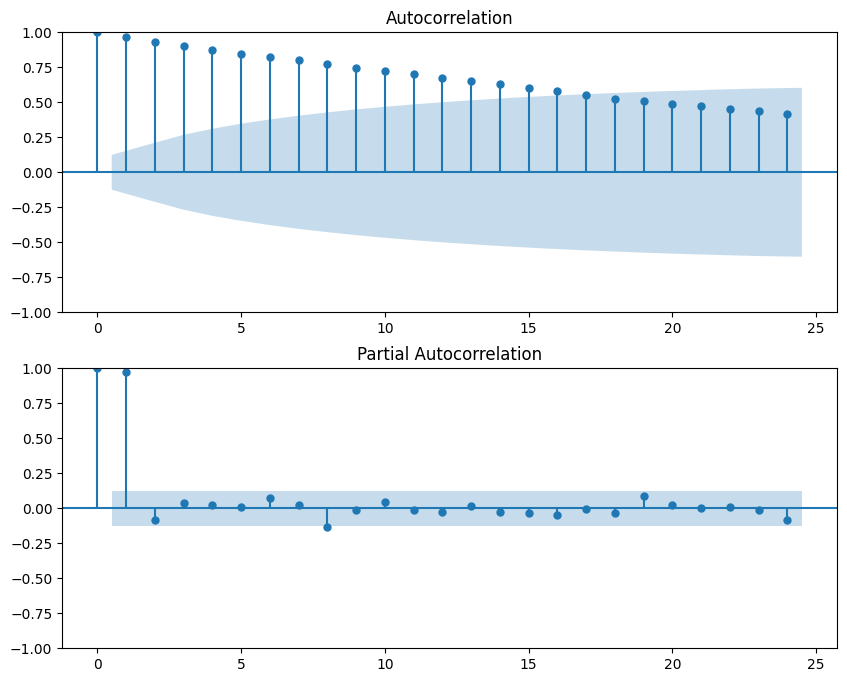

In [ ]:
#plotting the PACF and ACF

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(df['GreenBond'], ax=ax1)
plot_pacf(df['GreenBond'], ax=ax2)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


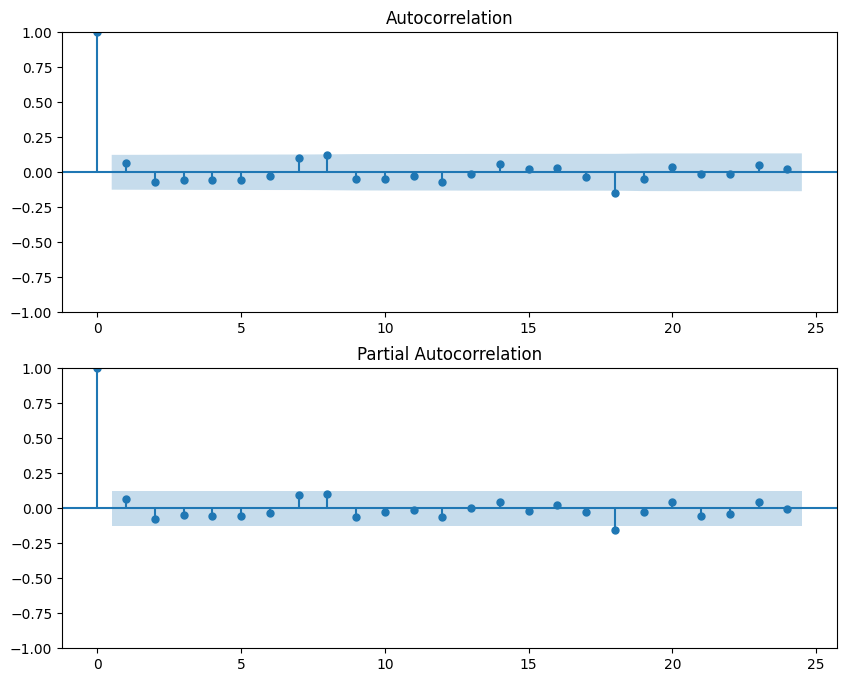

In [ ]:
#Perform first differencing and check the plots again

df['diff'] = df['GreenBond'].diff().fillna(0)
fig, (ax3, ax4) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(df['diff'], ax=ax3)
plot_pacf(df['diff'], ax=ax4)
plt.show()

In [ ]:
# Split the data into exogenous variables (X) and endogenous variable (y)

X = df[['lag1', 'lag2', 'lag3', 'lag4', 'lag5','lag25', 'lag75']]  # Replace 'lag1' to 'lag75' with the actual column names
y = df['GreenBond']

In [ ]:
#Creating ARIMAX models

model = sm.tsa.ARIMA(y, order=(1, 1, 2), exog=X)
results = model.fit()
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              GreenBond   No. Observations:                  248
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -136.791
Date:                Fri, 02 Jun 2023   AIC                            291.581
Time:                        16:29:10   BIC                            323.166
Sample:                             0   HQIC                           304.297
                                - 248                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
lag1           0.0002      0.073      0.002      0.998      -0.143       0.144
lag2          -0.0013      0.071     -0.019      0.985      -0.141       0.138
lag3          -0.0017      0.058     -0.029      0.9

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
#Creating another ARIMAX models

model1 = sm.tsa.ARIMA(y, order=(1, 1, 1), exog=X)
results = model1.fit()
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              GreenBond   No. Observations:                  248
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -137.047
Date:                Fri, 02 Jun 2023   AIC                            290.094
Time:                        16:29:41   BIC                            318.169
Sample:                             0   HQIC                           301.397
                                - 248                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
lag1         6.09e-05      0.384      0.000      1.000      -0.753       0.753
lag2          -0.0015      0.060     -0.024      0.981      -0.120       0.117
lag3          -0.0018      0.062     -0.029      0.9

In [ ]:
# Obtain the residuals
residuals = results.resid

In [ ]:
# Split the data into train and test sets
train_size = int(len(df) * 0.8)  # 80% for training
train, test = df[:train_size], df[train_size:]

In [ ]:
# Separate the exogenous variables for train and test sets
train_X, test_X = train[['lag1', 'lag2', 'lag3', 'lag4', 'lag5']], test[['lag1', 'lag2', 'lag3', 'lag4', 'lag5']]

In [ ]:
# Separate the endogenous variable for train and test sets
train_y, test_y = train['GreenBond'], test['GreenBond']

In [ ]:
# Predict the test set
predictions = results.predict(start=len(train), end=len(train) + len(test) - 1, exog=test_X)

In [ ]:
# Calculate evaluation metrics (RMSE, MAE, MAPE)
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
rmse = np.sqrt(mean_squared_error(test_y, predictions))
mae = mean_absolute_error(test_y, predictions)
mape = np.mean(np.abs((test_y - predictions) / test_y)) * 100

In [ ]:
print("Evaluation Metrics for Test Set:")
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

Evaluation Metrics for Test Set:
RMSE: 0.5201133808881668
MAE: 0.38334511956152767
MAPE: 0.2559031302569329


In [ ]:
# Predict the train set
train_predictions = results.predict(start=0, end=len(train) - 1, exog=train_X)

In [ ]:
# Calculate AIC and BIC
aic = results.aic
bic = results.bic

In [ ]:
print("AIC:", aic)
print("BIC:", bic)

AIC: 290.09371041149893
BIC: 318.16881710452276


In [ ]:
#Importing a library for Neural Network
from sklearn.neural_network import MLPRegressor

In [ ]:
# Train a neural network with the residuals
nn_model2 = MLPRegressor(hidden_layer_sizes=(100, 50, 30), random_state=42)

In [ ]:
# Prepare  training data for the neural network
train_X_nn = train_X.iloc[:len(train_y)]
residuals_nn = residuals.iloc[:len(train_y)]

In [ ]:
nn_model2.fit(train_X_nn, residuals_nn)

MLPRegressor(hidden_layer_sizes=(100, 50, 30), random_state=42)

In [ ]:
# Get neural network predictions for the test set
nn_test_predictions2 = nn_model2.predict(test_X)

In [ ]:
# Get neural network predictions for the train set
nn_train_predictions2 = nn_model2.predict(train_X)

In [ ]:
#Combining ARIMAX test predictions with NN test predictions to establish a hybrid model
integrated_test_predictions2 = (predictions + nn_test_predictions2)

In [ ]:
# Calculate evaluation metrics (RMSE, MAE, MAPE) for hybrid test predictions
integrated_rmse = np.sqrt(mean_squared_error(test_y, integrated_test_predictions2))
integrated_mae = mean_absolute_error(test_y, integrated_test_predictions2)
integrated_mape = np.mean(np.abs((test_y - integrated_test_predictions2) / test_y)) * 100

print("Evaluation Metrics for Integrated Test Set:")
print("RMSE:", integrated_rmse)
print("MAE:", integrated_mae)
print("MAPE:", integrated_mape)

Evaluation Metrics for Integrated Test Set:
RMSE: 1.933974877492895
MAE: 1.8593035849565729
MAPE: 1.2394949629503467


In [ ]:
#Establishing a hybrid model for the train set
integrated_train_predictions2 = (train_predictions + nn_train_predictions2)

In [ ]:
# Calculate evaluation metrics (RMSE, MAE, MAPE) for hybrid train predictions
integrated_rmse = np.sqrt(mean_squared_error(train_y, integrated_train_predictions2))
integrated_mae = mean_absolute_error(train_y, integrated_train_predictions2)
integrated_mape = np.mean(np.abs((train_y - integrated_train_predictions2) / train_y)) * 100

print("Evaluation Metrics for Integrated Train Set:")
print("RMSE:", integrated_rmse)
print("MAE:", integrated_mae)
print("MAPE:", integrated_mape)

Evaluation Metrics for Integrated Train Set:
RMSE: 11.460337449354837
MAE: 2.7360153753146794
MAPE: 1.7549282619256052


In [ ]:
#Importing libraries for LSTM models
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
#Preparing the data for LSTM modelling

train_size1 = int(len(residuals) * 0.8)  # 80% train set, 20% test set
train_data1 = residuals[:train_size1]
test_data1 = residuals[train_size1:]

In [ ]:
#Function to create Input and Output 

def prepare_data(residuals, n_steps):
    X, y = [], []
    for i in range(len(residuals) - n_steps):
        X.append(residuals[i:i + n_steps])
        y.append(residuals[i + n_steps])
    X, y = np.array(X), np.array(y)
    return X, y

In [ ]:
n_steps = 2  # Number of time steps to consider
X_train, y_train = prepare_data(train_data1, n_steps)
X_test, y_test1 = prepare_data(test_data1, n_steps)

In [ ]:
# Build TWO LSTM layers with different units (64 and 32) and activation functions (relu). 
model_lstm1 = Sequential()
model_lstm1.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(n_steps, 1)))
model_lstm1.add(LSTM(units=32, activation='relu'))
model_lstm1.add(Dense(units=1))
model_lstm1.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model_lstm1.fit(X_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
13/13 [==============================] - 4s 7ms/step - loss: 0.1560
Epoch 2/10
13/13 [==============================] - 0s 9ms/step - loss: 0.1672
Epoch 3/10
13/13 [==============================] - 0s 6ms/step - loss: 0.1545
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1545
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1541
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1539
Epoch 7/10
13/13 [==============================] - 0s 6ms/step - loss: 0.1539
Epoch 8/10
13/13 [==============================] - 0s 6ms/step - loss: 0.1538
Epoch 9/10
13/13 [==============================] - 0s 6ms/step - loss: 0.1538
Epoch 10/10
13/13 [==============================] - 0s 6ms/step - loss: 0.1537


In [ ]:
lstm_prediction1 = model_lstm1.predict(X_test).flatten()

2/2 [==============================] - 0s 6ms/step


In [ ]:
lstm_train_prediction1 = model_lstm1.predict(X_train).flatten()

7/7 [==============================] - 0s 3ms/step


In [ ]:
resized_lstm_train_prediction1 = np.resize(lstm_train_prediction1, (198))

In [ ]:
#establishing ARIMAX+LSTM models
integrated_train_predictions_lstm1 = (train_predictions + resized_lstm_train_prediction1)

In [ ]:
# Calculate evaluation metrics (RMSE, MAE, MAPE) for ARIMAX+LSTM test predictions
integrated_rmse = np.sqrt(mean_squared_error(train_y, integrated_train_predictions_lstm1))
integrated_mae = mean_absolute_error(train_y, integrated_train_predictions_lstm1)
integrated_mape = np.mean(np.abs((train_y - integrated_train_predictions_lstm1) / train_y)) * 100

print("Evaluation Metrics for Integrated Train Set:")
print("RMSE:", integrated_rmse)
print("MAE:", integrated_mae)
print("MAPE:", integrated_mape)

Evaluation Metrics for Integrated Train Set:
RMSE: 11.304821258302686
MAE: 1.098531400024231
MAPE: 0.6966136475771907


In [ ]:
resized_lstm_prediction1 = np.resize(lstm_prediction1, (50,))

In [ ]:
integrated_test_predictions_lstm1 = (predictions + resized_lstm_prediction1)

In [ ]:
# Calculate evaluation metrics (RMSE, MAE, MAPE) for integrated test predictions
integrated_rmse = np.sqrt(mean_squared_error(test_y, integrated_test_predictions_lstm1))
integrated_mae = mean_absolute_error(test_y, integrated_test_predictions_lstm1)
integrated_mape = np.mean(np.abs((test_y - integrated_test_predictions_lstm1) / test_y)) * 100

print("Evaluation Metrics for Integrated Test Set:")
print("RMSE:", integrated_rmse)
print("MAE:", integrated_mae)
print("MAPE:", integrated_mape)

Evaluation Metrics for Integrated Test Set:
RMSE: 0.5189496125341756
MAE: 0.38211121105666224
MAPE: 0.25505100867943287


In [ ]:
#Importing copula models.
# Note : A generic copula has been use to automatically detect the best copula family for the data.

from copulas.univariate import BetaUnivariate, GammaUnivariate, GaussianUnivariate, StudentTUnivariate

In [ ]:
#Instatntiating the copula model
copula = StudentTUnivariate()

In [ ]:
#Fitting the copula model
copula.fit(residuals)

In [ ]:
#Copula parameters
copula._params

{'df': 2.5504377265870906,
 'loc': -0.008044818993257586,
 'scale': 0.296646661926558}

In [ ]:
#Simulating a synthetic data from the copula model
simulated = copula.sample(len(integrated_test_predictions2))

In [ ]:
#Second Simulation
simulated2 = copula.sample(len(train_predictions))

In [ ]:
#Integrating copula into the hybrid ARIMAX-NN models
Total_combined_ANN_test = integrated_test_predictions2 + simulated

In [ ]:
# Calculate evaluation metrics (RMSE, MAE, MAPE) for ARIMAX+NN+COPULA test predictions
Total_ANN_rmse = np.sqrt(mean_squared_error(test_y, Total_combined_ANN_test))
Total_ANN_MAE = mean_absolute_error(test_y, Total_combined_ANN_test)
Total_ANN_MAPE = np.mean(np.abs((test_y - Total_combined_ANN_test) / test_y)) * 100

print("Evaluation Metrics for NN Test Set:")
print("RMSE:", integrated_rmse)
print("MAE:", integrated_mae)
print("MAPE:", integrated_mape)

Evaluation Metrics for NN Test Set:
RMSE: 0.5189496125341756
MAE: 0.38211121105666224
MAPE: 0.25505100867943287


In [ ]:
#Integrating Copula into hybrid ARIMAZ-LSTM
Total_combined_lstm_test = simulated + integrated_test_predictions_lstm1

In [ ]:
# Calculate evaluation metrics (RMSE, MAE, MAPE) for ARIMAX+LSTM+COPULA test predictions
Total_ANN_rmse = np.sqrt(mean_squared_error(test_y, Total_combined_lstm_test))
Total_ANN_MAE = mean_absolute_error(test_y, Total_combined_lstm_test)
Total_ANN_MAPE = np.mean(np.abs((test_y - Total_combined_lstm_test) / test_y)) * 100

print("Evaluation Metrics for LSTM Test Set:")
print("RMSE:", integrated_rmse)
print("MAE:", integrated_mae)
print("MAPE:", integrated_mape)

Evaluation Metrics for LSTM Test Set:
RMSE: 0.5189496125341756
MAE: 0.38211121105666224
MAPE: 0.25505100867943287


In [ ]:
#Integrating copula for the train set(ARIMAX+ANN+COPULA)
Total_combined_ANN_train = simulated2 + integrated_train_predictions2

In [ ]:
# Calculate evaluation metrics (RMSE, MAE, MAPE) for integrated train set
integrated_rmse = np.sqrt(mean_squared_error(train_y, Total_combined_ANN_train))
integrated_mae = mean_absolute_error(train_y, Total_combined_ANN_train)
integrated_mape = np.mean(np.abs((train_y - Total_combined_ANN_train) / train_y)) * 100

print("Evaluation Metrics for NN train Set:")
print("RMSE:", integrated_rmse)
print("MAE:", integrated_mae)
print("MAPE:", integrated_mape)

Evaluation Metrics for NN train Set:
RMSE: 11.547375101809292
MAE: 2.81758771463548
MAPE: 1.8074161133043478


In [ ]:
#Integrating COPULA
Total_combined_lstm_train = simulated2 + integrated_train_predictions_lstm1

In [ ]:
# Calculate evaluation metrics (RMSE, MAE, MAPE) for integrated test predictions
integrated_rmse = np.sqrt(mean_squared_error(train_y, Total_combined_lstm_train))
integrated_mae = mean_absolute_error(train_y, Total_combined_lstm_train)
integrated_mape = np.mean(np.abs((train_y - Total_combined_lstm_train) / train_y)) * 100

print("Evaluation Metrics for LSTM train Set:")
print("RMSE:", integrated_rmse)
print("MAE:", integrated_mae)
print("MAPE:", integrated_mape)

Evaluation Metrics for LSTM train Set:
RMSE: 11.379976488491737
MAE: 1.2937087869442645
MAPE: 0.8227198314739349


In [ ]:
def compute_log_likelihood(y, y_pred, sigma):
    train_residuals = y - y_pred
    log_likelihood = -0.5 * np.sum(np.log(2 * np.pi) + np.log(sigma) + (train_residuals ** 2) / sigma ** 2)
    return log_likelihood

In [ ]:
def compute_aic_bic(y_train, y_pred, n_params):
    n = len(y)  # number of observations
    
    # Compute the residuals
    train_residuals = y - y_pred
    sigma = np.std(train_residuals)
    
    # Compute the log-likelihood
    log_likelihood = compute_log_likelihood(y, y_pred, sigma)
    
    # Compute AIC and BIC
    aic = (2 * n_params - 2 * log_likelihood)/4
    bic = (np.log(n) * n_params - 2 * log_likelihood)/4
    
    return aic, bic

In [ ]:
aic, bic = compute_aic_bic(train_y, Total_combined_ANN_train, 2)

print("AIC:", aic)
print("BIC:", bic)

AIC: 264.1890197917562
BIC: 265.9457341648387


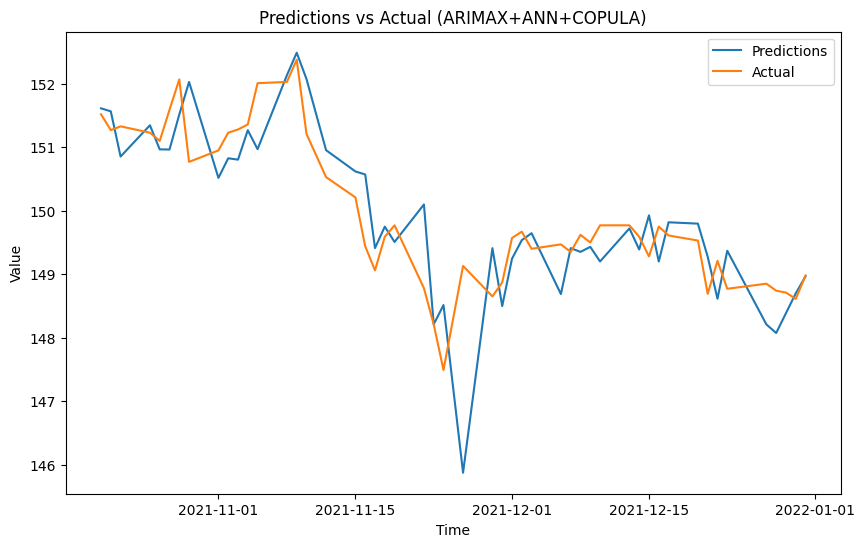

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Total_combined_lstm_test, label='Predictions')
plt.plot(test_y, label='Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Predictions vs Actual (ARIMAX+ANN+COPULA)')
plt.legend()
plt.show()